# Heat Map - Fake Covid-19 dataset

In order to create the heatmap, we need the following packages:

In [ ]:
import json
from collections import Counter
import pandas as pd
import altair as alt
import datetime
from dateutil.parser import parse
from itertools import groupby
from operator import itemgetter

To read the JSON file that has all the tweets, it is necessary to do:

In [ ]:
data = []
with open('dataset/fakecovid_result_final_translated_full.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))

We're interested in the "created_at" field.

In [ ]:
lista = []
index = 0

for element in data: 
    token=data[index]['created_at']
    d = parse(token)
    d = d.strftime('%Y/%m/%d')
    lista.append(d)
    index=index+1

After converting the related date into a string, the number of occurrences in the created 'lista' has been counted.
Then the DataFrame, that is a 2-dimensional labeled data structure, was generated from the array 'lista'.

In [ ]:
count=Counter(lista)

start = datetime.datetime.strptime("2020/01/01", "%Y/%m/%d")
end = datetime.datetime.strptime("2020/09/01", "%Y/%m/%d")
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]

for date in date_generated:
    if date.strftime("%Y/%m/%d") not in count:
        count[date.strftime("%Y/%m/%d")] = 0

df = pd.DataFrame.from_dict(count, orient='index').reset_index()
df = df.rename(columns={'index':'data', 0:'tweet_count'})

The heatmap is created:

In [ ]:
chart = alt.Chart(
    df,
    title="Tweet count heatmap"
).mark_rect().encode(
    x=alt.X('date(data):O',title="Day"),
    y=alt.Y('month(data):O',title="Month"),
    color=alt.Color('tweet_count:Q', scale=alt.Scale(scheme="turbo"),title="Tweet count"),
    tooltip=[
        alt.Tooltip('monthdate(data):T', title='Date'),
        alt.Tooltip('tweet_count:Q', title='Tweet count')
    ]
).properties(width=800, height=300)

# Configure text
text = chart.mark_text(baseline='middle').encode(
    text='tweet_count:Q',
    color=alt.condition(
        alt.FieldRangePredicate(field='tweet_count', range=[12,25]),
        alt.value('black'),#if true
        alt.value('white')#if false
    )
)

(chart + text).configure_title(
    fontSize=17,
    offset=25
).configure_axis(
    labelFontSize=13,
    titleFontSize=15,
    titlePadding=15
).configure_legend(
    gradientThickness=20,
    titleFontSize=14,
    labelFontSize=12,
    titlePadding=10
)

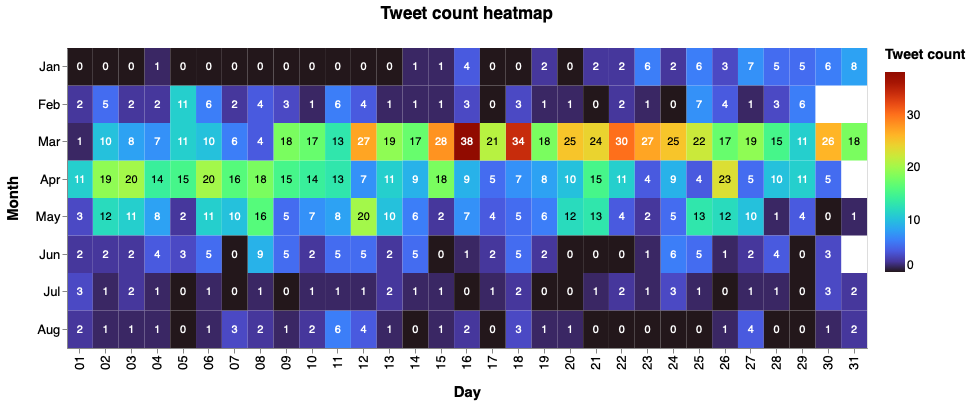

## Heat Map - Time/Day of the week

The code is pretty much the same as the above. The heatmap now shows a peak in the number of tweets created after 10 am every day of the week.

In [ ]:
lista_ora = []
index_ora = 0

for element in data: 
    token=data[index_ora]['created_at']
    day = parse(token)
    day = day.strftime('%a')
    
    hour = parse(token)
    hour = hour.strftime('%H')
    
    lista_ora.append(day + " "+ hour)
    index_ora=index_ora+1


count_ora=Counter(lista_ora)

df_ora = pd.DataFrame.from_dict(count_ora, orient='index').reset_index()
df_ora = df_ora.rename(columns={'index':'data', 0:'tweet_count'})
columnone = df_ora['data'].tolist()

dlist = []
hlist = []
for el in columnone:
    t = el.split()
    dlist.append(t[0])
    hlist.append(t[1])
    
df_ora['data'] = dlist
df_ora['ora'] = hlist

chartuno = alt.Chart(
    df_ora,
    title="Time/Day of the week heatmap"
).mark_rect().encode(
    x=alt.X('ora:N',title="Hour"),
    y=alt.Y('data:N',sort=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],title="Day of the week"),
    color=alt.Color('tweet_count:Q', scale=alt.Scale(scheme="plasma"),title="Tweet count"),
    tooltip=[
        alt.Tooltip('data:N', title='Date'),
        alt.Tooltip('tweet_count:Q', title='Tweet count')
    ]
).properties(width=800, height=300)

# Configure text
textuno = chartuno.mark_text(baseline='middle').encode(
    text='tweet_count:Q',
    color=alt.condition(
        alt.FieldRangePredicate(field='tweet_count', range=[1,16]),
        alt.value('white'), #if true
        alt.value('black') #if false
    )
)

(chartuno + textuno).configure_title(
    fontSize=17,
    offset=25
).configure_axis(
    labelFontSize=13,
    titleFontSize=15,
    titlePadding=15
).configure_legend(
    gradientThickness=20,
    titleFontSize=14,
    labelFontSize=12,
    titlePadding=10
)

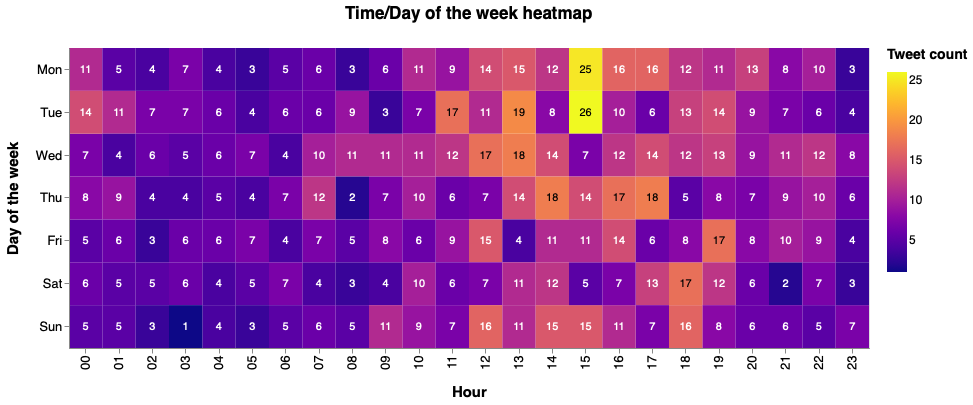

## Heat Map Engagement - Number of Likes generated by all the tweets in the dataset for each date

The code is the pretty much the same as above, in this case we have considered the 'favorite count' field and worked on it.

In [ ]:
likes = []
index = 0

for element in data: 
    token=data[index]['created_at']
    d = parse(token)
    d = d.strftime('%Y/%m/%d')
    like=(d,data[index]['favorite_count'])
    
    likes.append(like)
    index=index+1


first = itemgetter(0)

sums = [(k, sum(item[1] for item in tups_to_sum))
        for k, tups_to_sum in groupby(sorted(likes, key=first), key=first)]
dictsum=dict(sums)


start = datetime.datetime.strptime("2020/01/01", "%Y/%m/%d")
end = datetime.datetime.strptime("2020/09/01", "%Y/%m/%d")
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]

for date in date_generated:
    if date.strftime("%Y/%m/%d") not in dictsum:
        dictsum[date.strftime("%Y/%m/%d")] = 0


dfa = pd.DataFrame.from_dict(dictsum, orient='index').reset_index()
dfa = dfa.rename(columns={'index':'data', 0:'likes_count'})


chartdue = alt.Chart(
    dfa,
    title="Likes heatmap"
).mark_rect().encode(
    x=alt.X('date(data):O',title="Day"),
    y=alt.Y('month(data):O',title="Month"),
    color=alt.Color('likes_count:Q', scale=alt.Scale(scheme="turbo"),title="Likes count"),
    tooltip=[
        alt.Tooltip('monthdate(data):T', title='Date'),
        alt.Tooltip('likes_count:Q', title='Likes count')
    ]
).properties(width=1500, height=500)

# Configure text
textdue = chartdue.mark_text(baseline='middle').encode(
    text='likes_count:Q',
    color=alt.condition(
        alt.FieldRangePredicate(field='likes_count', range=[1454000,1455000]),
        alt.value('black'),
        alt.value('white')
    )
)

(chartdue + textdue).configure_title(
    fontSize=17,
    offset=25
).configure_axis(
    labelFontSize=13,
    titleFontSize=15,
    titlePadding=15
).configure_legend(
    gradientThickness=25,
    titleFontSize=14,
    labelFontSize=12,
    titlePadding=10
)

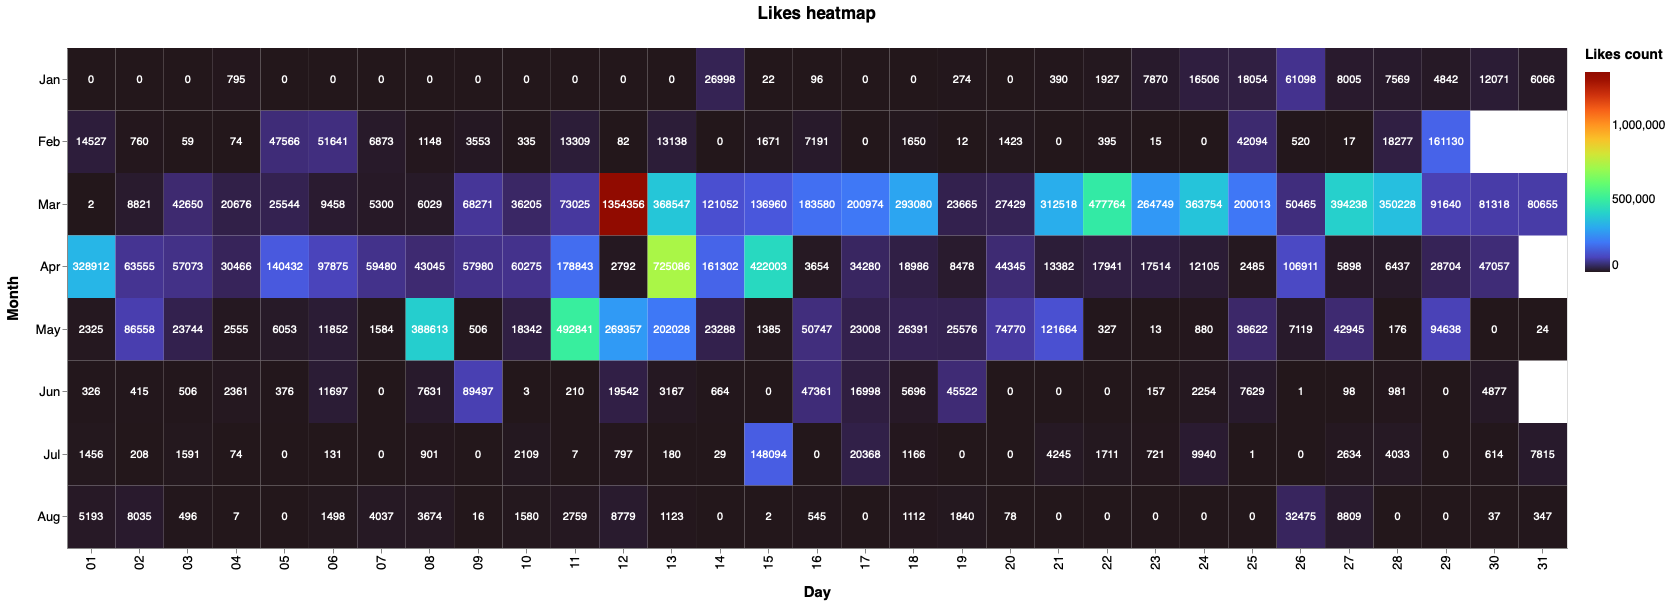

## Heat Map Engagement - Number of Retweets generated by all the tweets in the dataset for each date

The code is the pretty much the same as above, in this case we have considered the 'favorite count' field and worked on it.

In [ ]:
rts = []
index = 0

for element in data: 
    token=data[index]['created_at']
    d = parse(token)
    d = d.strftime('%Y/%m/%d')
    rt=(d,data[index]['retweet_count'])
    
    rts.append(rt)
    index=index+1
    


first_rt = itemgetter(0)
sums_rt = [(k, sum(item[1] for item in tups_to_sum))
        for k, tups_to_sum in groupby(sorted(rts, key=first_rt), key=first_rt)]
dictsum_rt=dict(sums_rt)


start = datetime.datetime.strptime("2020/01/01", "%Y/%m/%d")
end = datetime.datetime.strptime("2020/09/01", "%Y/%m/%d")
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]

for date in date_generated:
    if date.strftime("%Y/%m/%d") not in dictsum_rt:
        dictsum_rt[date.strftime("%Y/%m/%d")] = 0


df_rt = pd.DataFrame.from_dict(dictsum_rt, orient='index').reset_index()
df_rt = df_rt.rename(columns={'index':'data', 0:'retweet_count'})

#["#6e40aa","#6d41ab","#6d41ad","#6d42ae","#6c43af","#6c43b0","#6b44b2","#6b45b3","#6a46b4","#6a46b5","#6a47b7","#6948b8","#6849b9","#684aba","#674abb","#674bbd","#664cbe","#664dbf","#654ec0","#654fc1","#6450c2","#6350c3","#6351c4","#6252c5","#6153c6","#6154c7","#6055c8","#5f56c9","#5f57ca","#5e58cb","#5d59cc","#5c5acd","#5c5bce","#5b5ccf","#5a5dd0","#595ed1","#595fd1","#5860d2","#5761d3","#5662d4","#5663d5","#5564d5","#5465d6","#5366d7","#5267d7","#5168d8","#5169d9","#506ad9","#4f6bda","#4e6cda","#4d6ddb","#4c6edb","#4b70dc","#4b71dc","#4a72dd","#4973dd","#4874de","#4775de","#4676df","#4577df","#4479df","#447adf","#437be0","#427ce0","#417de0","#407ee0","#3f80e1","#3e81e1","#3d82e1","#3d83e1","#3c84e1","#3b86e1","#3a87e1","#3988e1","#3889e1","#378ae1","#378ce1","#368de1","#358ee1","#348fe1","#3390e1","#3292e1","#3293e1","#3194e0","#3095e0","#2f96e0","#2e98e0","#2e99df","#2d9adf","#2c9bdf","#2b9cde","#2b9ede","#2a9fdd","#29a0dd","#29a1dd","#28a2dc","#27a4dc","#26a5db","#26a6db","#25a7da","#25a8d9","#24aad9","#23abd8","#23acd8","#22add7","#22aed6","#21afd5","#21b1d5","#20b2d4","#20b3d3","#1fb4d2","#1fb5d2","#1eb6d1","#1eb8d0","#1db9cf","#1dbace","#1dbbcd","#1cbccc","#1cbdcc","#1cbecb","#1bbfca","#1bc0c9","#1bc2c8","#1ac3c7","#1ac4c6","#1ac5c5","#1ac6c4","#1ac7c2","#1ac8c1","#19c9c0","#19cabf","#19cbbe","#19ccbd","#19cdbc","#19cebb","#19cfb9","#19d0b8","#19d1b7","#19d2b6","#19d3b5","#1ad4b4","#1ad5b2","#1ad5b1","#1ad6b0","#1ad7af","#1bd8ad","#1bd9ac","#1bdaab","#1bdbaa","#1cdba8","#1cdca7","#1cdda6","#1ddea4","#1ddfa3","#1edfa2","#1ee0a0","#1fe19f","#1fe29e","#20e29d","#20e39b","#21e49a","#22e599","#22e597","#23e696","#24e795","#24e793","#25e892","#26e891","#27e98f","#27ea8e","#28ea8d","#29eb8c","#2aeb8a","#2bec89","#2cec88","#2ded87","#2eed85","#2fee84","#30ee83","#31ef82","#32ef80","#33f07f","#34f07e","#35f07d","#37f17c","#38f17a","#39f279","#3af278","#3bf277","#3df376","#3ef375","#3ff374","#41f373","#42f471","#43f470","#45f46f","#46f46e","#48f56d","#49f56c","#4bf56b","#4cf56a","#4ef56a","#4ff669","#51f668","#52f667","#54f666","#55f665","#57f664","#59f664","#5af663","#5cf662","#5ef661","#5ff761","#61f760","#63f75f","#64f75f","#66f75e","#68f75d","#6af75d","#6bf65c","#6df65c","#6ff65b","#71f65b","#73f65a","#74f65a","#76f659","#78f659","#7af659","#7cf658","#7ef658","#80f558","#81f558","#83f557","#85f557","#87f557","#89f557","#8bf457","#8df457","#8ff457","#91f457","#93f457","#94f357","#96f357","#98f357","#9af357","#9cf257","#9ef258","#a0f258","#a2f258","#a4f158","#a6f159","#a8f159","#aaf159","#abf05a","#adf05a","#aff05b"])),
    #cool è lo schema

c = alt.Chart(
    df_rt,
    title="Retweets heatmap"
).mark_rect().encode(
    x=alt.X('date(data):O',title="Day"),
    y=alt.Y('month(data):O',title="Month"),
    color=alt.Color('retweet_count:Q', title="Retweets count",scale=alt.Scale(scheme="turbo")),
    #cool è lo schema
    tooltip=[
        alt.Tooltip('monthdate(data):T', title='Date'),
        alt.Tooltip('retweet_count:Q', title='Retweet count')
    ]
).properties(width=1500, height=500)

# Configure text
t = c.mark_text(baseline='middle').encode(
    text='retweet_count:Q',
    color=alt.condition(
        alt.FieldRangePredicate(field='retweet_count', range=[500000,700000]),
        alt.value('black'),
        alt.value('white')
    )
)

(c + t).configure_title(
    fontSize=17,
    offset=25
).configure_axis(
    labelFontSize=13,
    titleFontSize=15,
    titlePadding=15
).configure_legend(
    gradientThickness=25,
    titleFontSize=14,
    labelFontSize=12,
    titlePadding=10
)

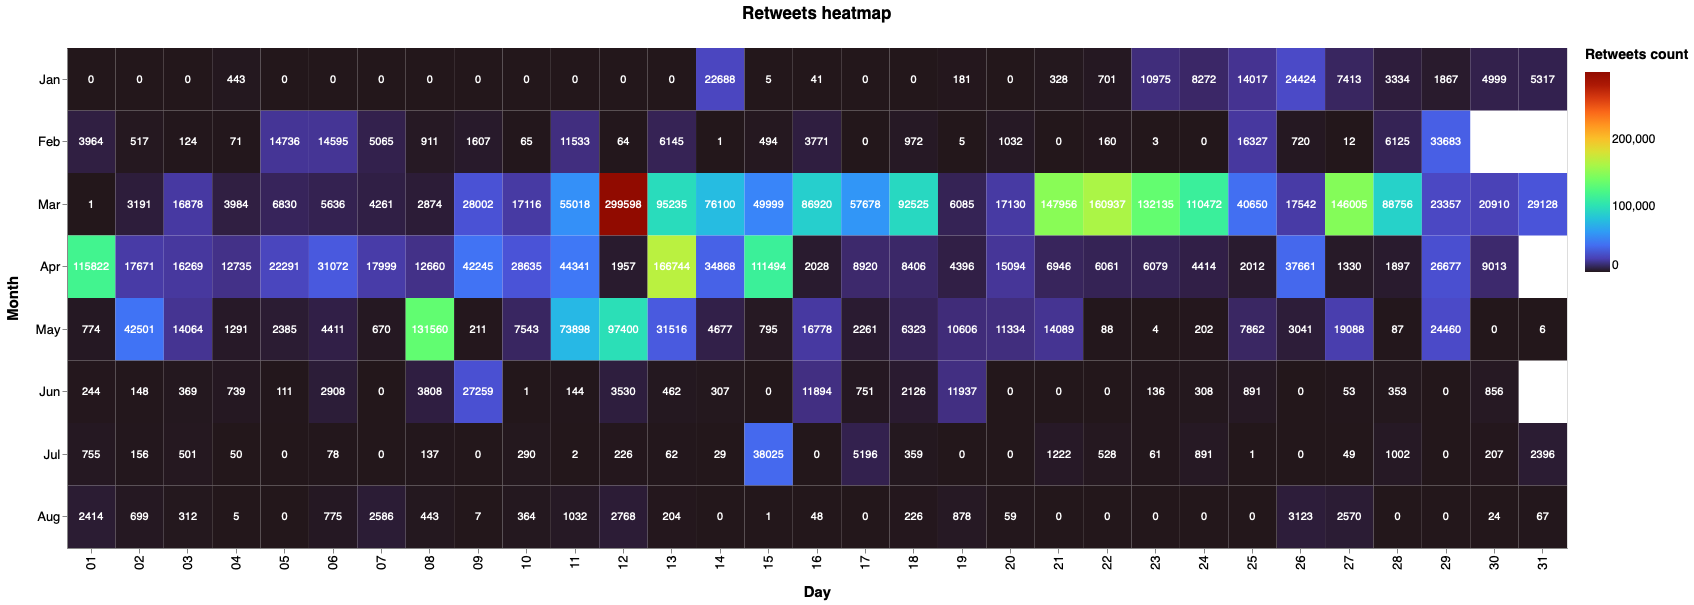